In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
data = pd.read_excel('Faster Boost_AB test result Sep 30 - Oct 14 2021-10-19T1106 v2.xlsx')

In [112]:
data.head()

,User bucket,Listing Information BDS Account ID,usage classification,Total user,Total boosted user,Total listing,Total boosted listing,Total boosting times,Boosting consumption,Renew listing,...,vs user v0_Boosting consumption/user,Consumption (incl. boosting)/user,vs user v0_Consumption (incl. boosting)/user,%boosted listing,vs user v0_%boosted listing,Boosting times/listing,Boosting consumption/listing,vs user v0_Boosting consumption/listing,Free boosting times/listing,Paid boosting times/listing
0,1.user v0,1390894,Frequent User,1,1,4,2,2,5.454,0,...,0.0,114.534,0.000000,0.500000,0.000000,1.0,2.727,0.0,0.0,1.0
1,1.user v0,1690278,Casual User,1,0,1,0,0,0.000,0,...,NaN,54.540,-0.523810,0.000000,-1.000000,NaN,NaN,NaN,NaN,NaN
2,1.user v0,863065,Power User,1,0,2,0,0,0.000,2,...,NaN,57.267,-0.500000,0.000000,-1.000000,NaN,NaN,NaN,NaN,NaN
3,1.user v0,1468186,Casual User,1,0,1,0,0,0.000,1,...,NaN,0.000,-1.000000,0.000000,-1.000000,NaN,NaN,NaN,NaN,NaN
4,1.user v0,1292066,Frequent User,1,1,21,9,9,24.543,13,...,3.5,302.697,1.642857,0.428571,-0.142857,1.0,2.727,0.0,0.0,1.0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38591 entries, 0 to 38590
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User bucket                                   38591 non-null  object 
 1   Listing Information BDS Account ID            38591 non-null  int64  
 2   usage classification                          38591 non-null  object 
 3   Total user                                    38591 non-null  int64  
 4   Total boosted user                            38591 non-null  int64  
 5   Total listing                                 38591 non-null  int64  
 6   Total boosted listing                         38591 non-null  int64  
 7   Total boosting times                          38591 non-null  int64  
 8   Boosting consumption                          38591 non-null  float64
 9   Renew listing                                 38591 non-null 

In [114]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Listing Information BDS Account ID,38591.0,1.208821e+06,482027.795292,141.0,831815.000000,1.394096e+06,1.637132e+06,1.715543e+06
Total user,38591.0,1.000000e+00,0.000000,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Total boosted user,38591.0,2.103081e-01,0.407533,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
Total listing,38591.0,9.161229e+00,17.935005,1.0,1.000000,3.000000e+00,1.000000e+01,8.300000e+02
Total boosted listing,38591.0,1.560727e+00,8.250533,0.0,0.000000,0.000000e+00,0.000000e+00,3.770000e+02
Total boosting times,38591.0,1.720816e+00,9.662914,0.0,0.000000,0.000000e+00,0.000000e+00,6.520000e+02
Boosting consumption,38591.0,6.853019e+00,41.297191,0.0,0.000000,0.000000e+00,0.000000e+00,3.199009e+03
Renew listing,38591.0,5.190666e+00,14.258102,0.0,0.000000,1.000000e+00,4.000000e+00,8.130000e+02
Consumption,38591.0,3.311286e+02,866.424514,0.0,38.178000,1.063530e+02,3.500000e+02,9.481801e+04
Total consumption (incl boosting),38591.0,3.379817e+02,884.025823,0.0,38.178000,1.090800e+02,3.517830e+02,9.481801e+04


In [30]:
data['Total consumption (incl boosting)'].value_counts()

19.089      3179
27.270      2540
38.178      2530
0.000       2026
57.267      1026
            ... 
511.802        1
2666.314       1
1297.183       1
2415.389       1
2309.930       1
Name: Total consumption (incl boosting), Length: 3901, dtype: int64

<AxesSubplot:xlabel='Total consumption (incl boosting)', ylabel='User bucket'>

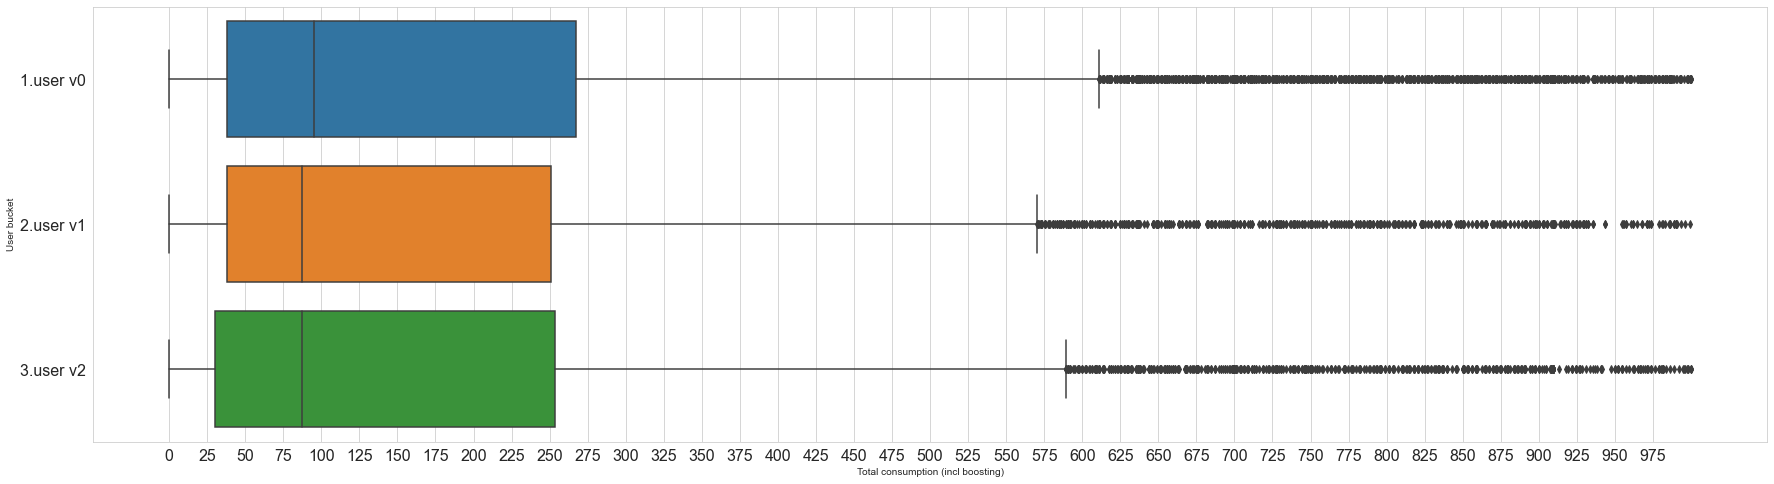

In [74]:
plt.figure(figsize=(30,8))
sns.set_style('whitegrid')
plt.xticks(np.arange(0,1000,25), fontsize=16)
plt.yticks(fontsize=16)
sns.boxplot(data=data.loc[data['Total consumption (incl boosting)']<1000], x='Total consumption (incl boosting)', y='User bucket', orient='h')

In [84]:
data[(data['User bucket'] == "1.user v0") & (data['Total consumption (incl boosting)'] > 610)].count()['Listing Information BDS Account ID']/data[data['User bucket'] == "1.user v0"].count()['Listing Information BDS Account ID']

0.14803272302298404

C:\Users\Laptop\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Total consumption (incl boosting)'>

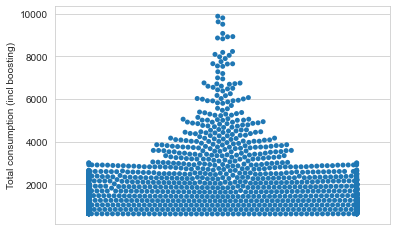

In [102]:
#plt.figure(figsize=(30,8))
sns.set_style('whitegrid')
sns.swarmplot(y='Total consumption (incl boosting)', data=data.loc[(data['Total consumption (incl boosting)'] > 610) & (data['Total consumption (incl boosting)'] <= 10000) & (data['User bucket'] == "1.user v0")])

In [85]:
data[(data['User bucket'] == "2.user v1") & (data['Total consumption (incl boosting)'] > 570)].count()['Listing Information BDS Account ID']/data[data['User bucket'] == "2.user v1"].count()['Listing Information BDS Account ID']

0.15888338116357945

C:\Users\Laptop\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Total consumption (incl boosting)'>

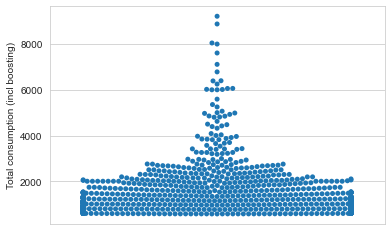

In [103]:
#plt.figure(figsize=(30,8))
sns.set_style('whitegrid')
sns.swarmplot(y='Total consumption (incl boosting)', data=data.loc[(data['Total consumption (incl boosting)'] > 570) & (data['Total consumption (incl boosting)'] <= 10000) & (data['User bucket'] == "2.user v1")])

In [86]:
data[(data['User bucket'] == "3.user v2") & (data['Total consumption (incl boosting)'] > 590)].count()['Listing Information BDS Account ID']/data[data['User bucket'] == "3.user v2"].count()['Listing Information BDS Account ID']

0.15251853745845054

C:\Users\Laptop\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Total consumption (incl boosting)'>

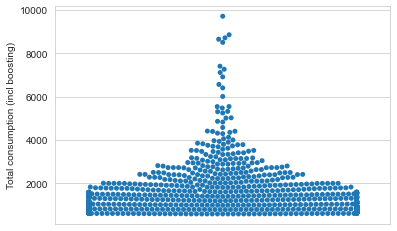

In [104]:
#plt.figure(figsize=(30,8))
sns.set_style('whitegrid')
sns.swarmplot(y='Total consumption (incl boosting)', data=data.loc[(data['Total consumption (incl boosting)'] > 590) & (data['Total consumption (incl boosting)'] <= 10000) & (data['User bucket'] == "3.user v2")])

<AxesSubplot:xlabel='Total boosting times', ylabel='User bucket'>

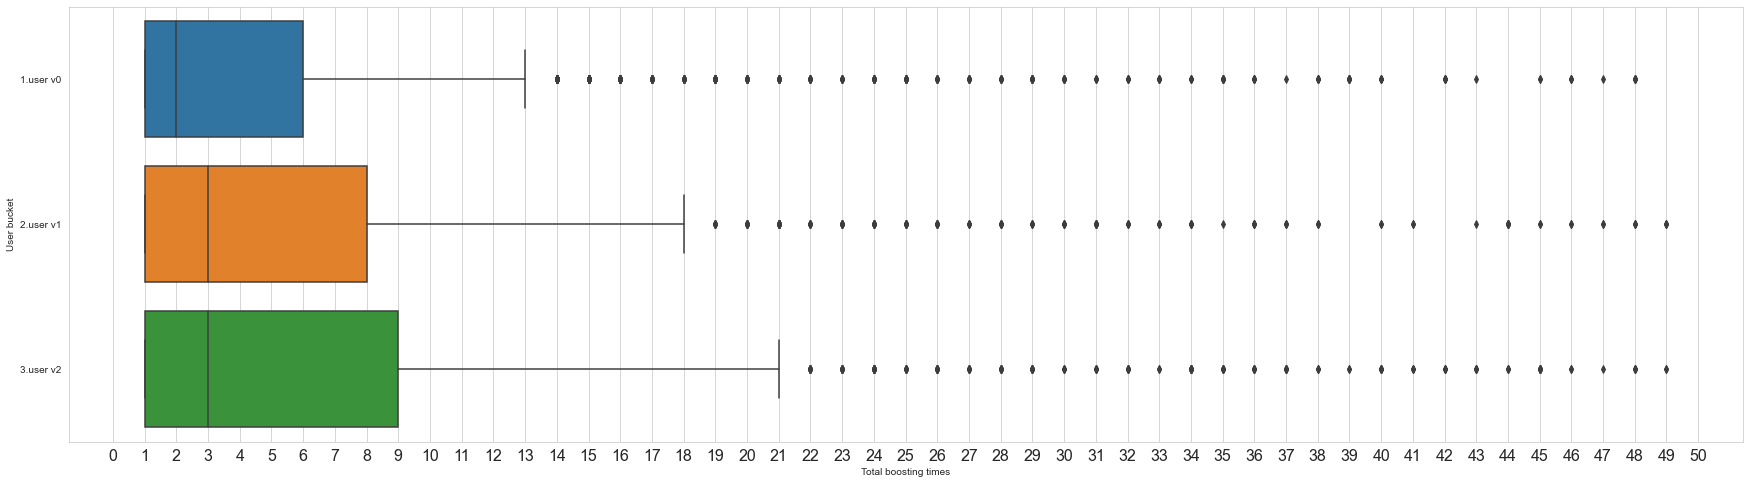

In [124]:
plt.figure(figsize=(30,8))
plt.xticks(np.arange(0,51,1), fontsize=16)
sns.boxplot(data=data.loc[(data['Total boosting times']<50) & (data['Total boosting times']>0)], x='Total boosting times', y='User bucket', width=0.8)

<AxesSubplot:xlabel='Consumption', ylabel='User bucket'>

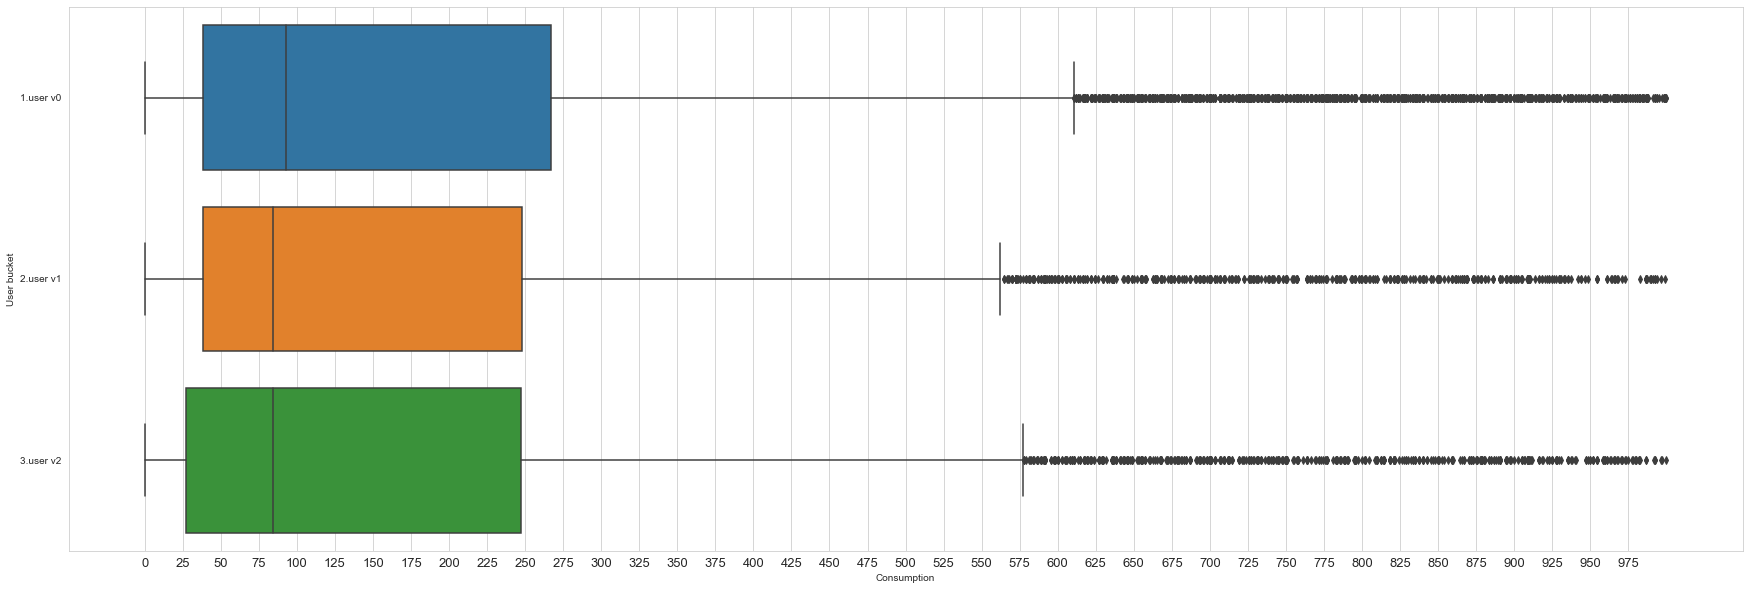

In [119]:
plt.figure(figsize=(30,10))
plt.xticks(np.arange(0,1000,25), fontsize=13)
sns.boxplot(data=data.loc[data['Consumption']<1000], x='Consumption', y='User bucket')

<AxesSubplot:xlabel='User bucket', ylabel='Total consumption (incl boosting)'>

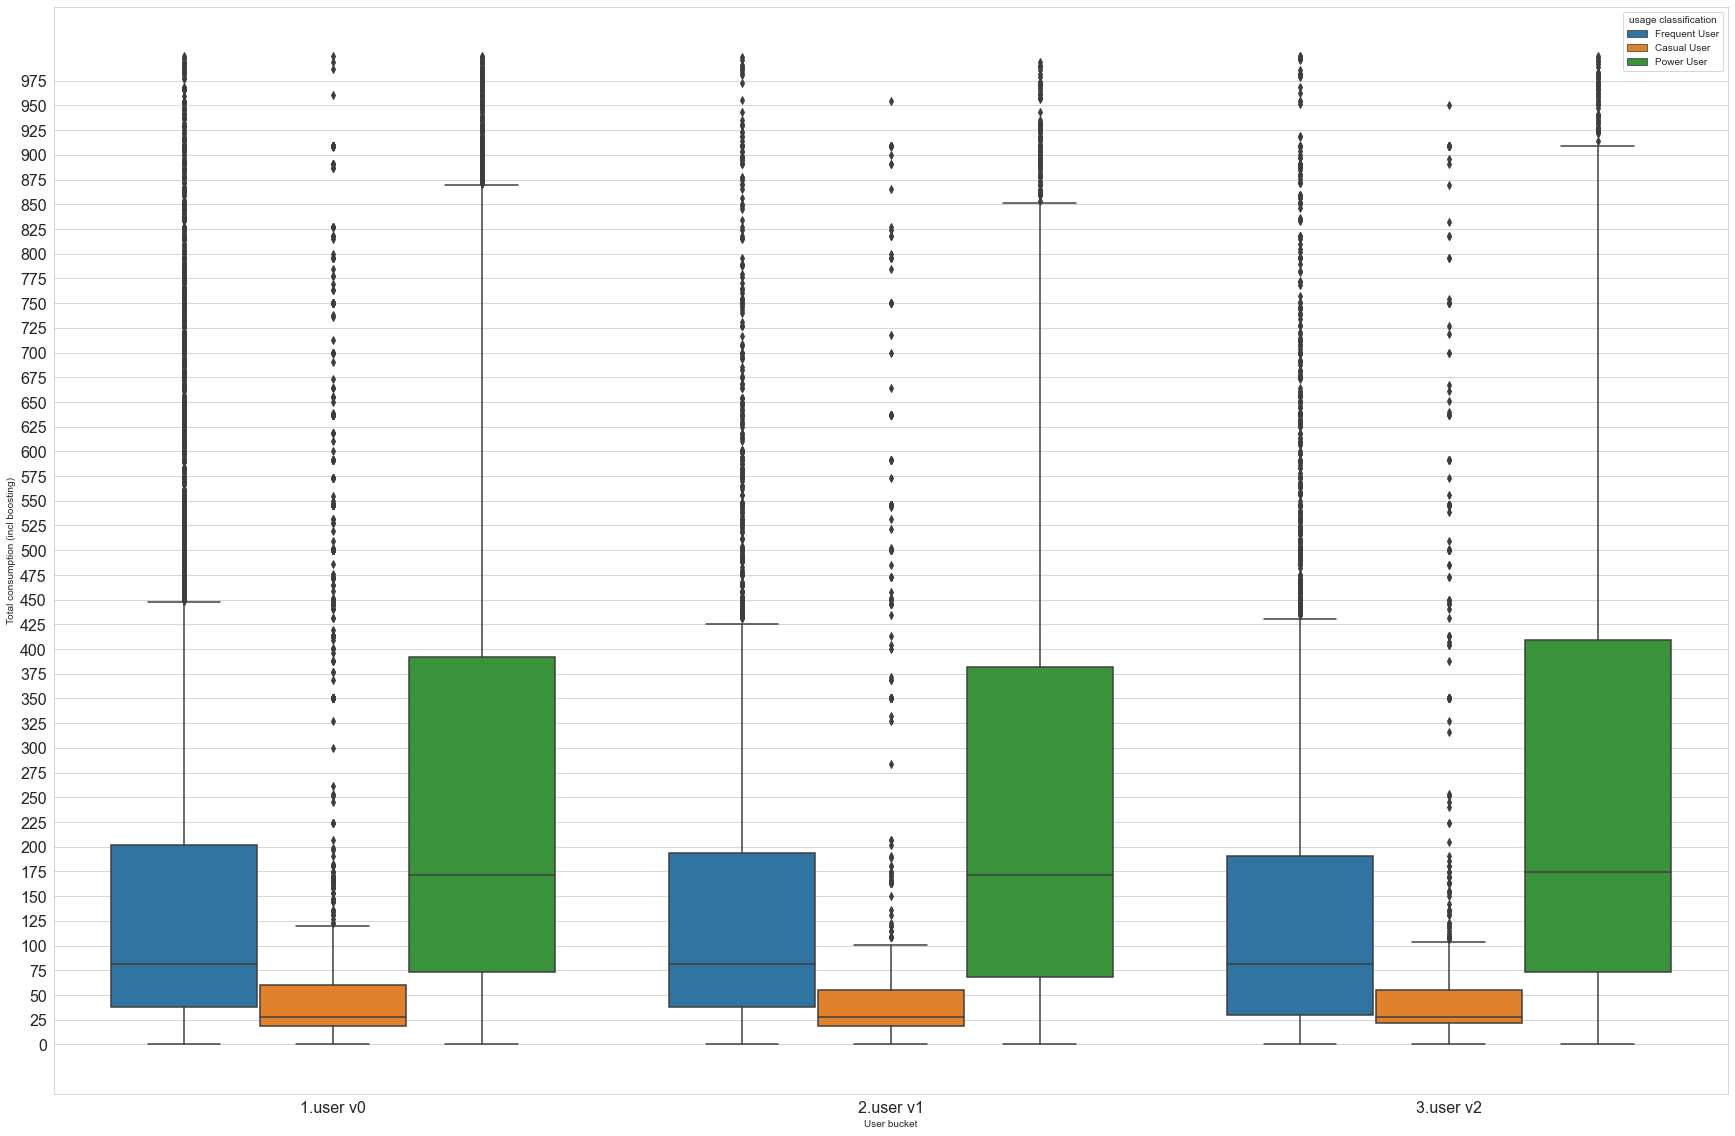

In [118]:
plt.figure(figsize=(30,20))
sns.set_style('whitegrid')
plt.yticks(np.arange(0,1000,25), fontsize=16)
plt.xticks(fontsize=16)
sns.boxplot(data=data.loc[data['Total consumption (incl boosting)']<1000], y='Total consumption (incl boosting)', x='User bucket', hue='usage classification')

<AxesSubplot:xlabel='User bucket', ylabel='Consumption'>

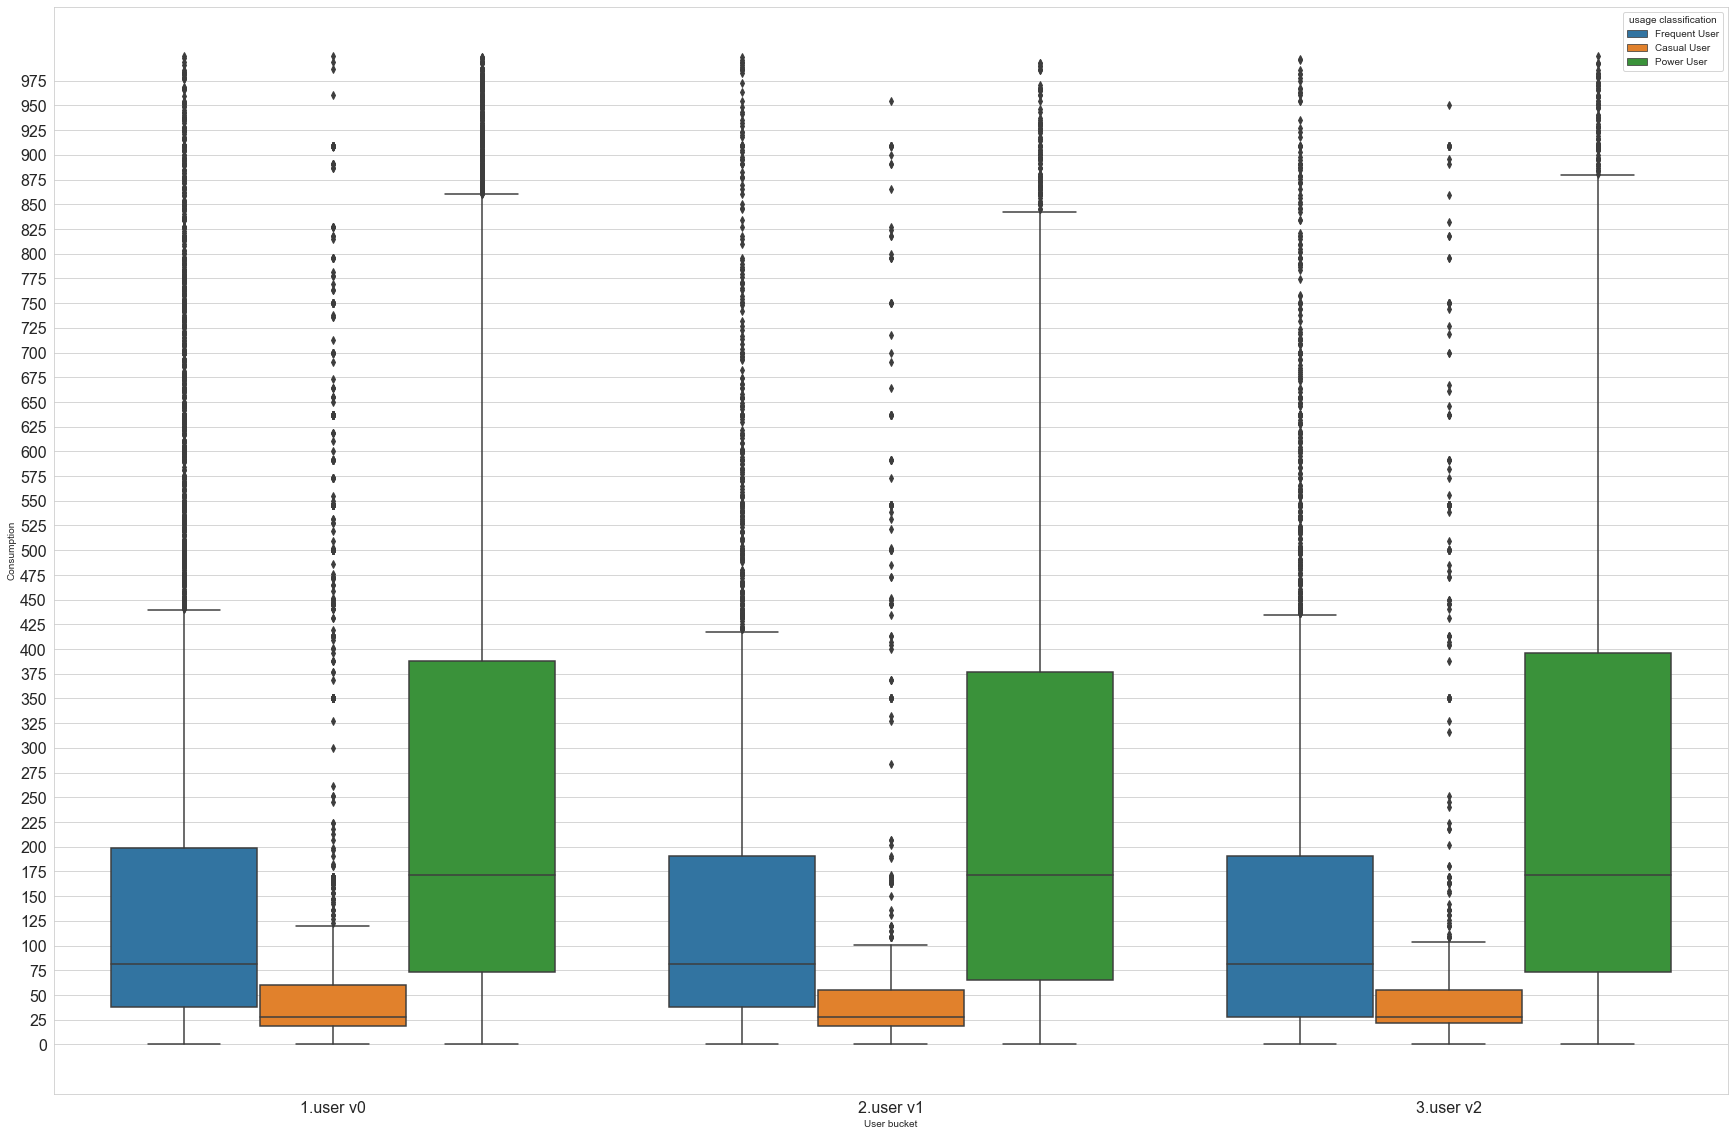

In [125]:
plt.figure(figsize=(30,20))
sns.set_style('whitegrid')
plt.yticks(np.arange(0,1000,25), fontsize=16)
plt.xticks(fontsize=16)
sns.boxplot(data=data.loc[data['Consumption']<1000], y='Consumption', x='User bucket', hue='usage classification')

In [128]:
a = data[data['User bucket'] == "1.user v0"]['Total consumption (incl boosting)']
b = data[data['User bucket'] == "2.user v1"]['Total consumption (incl boosting)']
c = data[data['User bucket'] == "3.user v2"]['Total consumption (incl boosting)']

In [234]:
a_mean=a.mean()
b_mean=b.mean()
c_mean=c.mean()
a_mean, b_mean, c_mean

(336.6585731722921, 338.54572945473683, 341.33665622603286)

In [131]:
from scipy import stats

In [241]:
t1, p1=stats.ttest_ind(a,b, equal_var=False)
t2, p2=stats.ttest_ind(a,c, equal_var=False)
t1,p1,t2,p2

(-0.1835711422473946, 0.85435290202607, -0.3080069058082578, 0.758083706025563)

In [157]:
x1 = data[(data['User bucket'] == "1.user v0") & (data['usage classification'] == 'Casual User')]['Total consumption (incl boosting)']
x2 = data[(data['User bucket'] == "2.user v1") & (data['usage classification'] == 'Casual User')]['Total consumption (incl boosting)']
x3 = data[(data['User bucket'] == "3.user v2") & (data['usage classification'] == 'Casual User')]['Total consumption (incl boosting)']

In [240]:
t1,p1=stats.ttest_ind(x1,x2, equal_var=False)
t2,p2=stats.ttest_ind(x1,x3, equal_var=False)
t1,p1,t2,p2

(-0.994917339671596,
 0.31991759186570273,
 0.7582946154432935,
 0.4483614374374314)

In [165]:
y1 = data[(data['User bucket'] == "1.user v0") & (data['usage classification'] == 'Frequent User')]['Total consumption (incl boosting)']
y2 = data[(data['User bucket'] == "2.user v1") & (data['usage classification'] == 'Frequent User')]['Total consumption (incl boosting)']
y3 = data[(data['User bucket'] == "3.user v2") & (data['usage classification'] == 'Frequent User')]['Total consumption (incl boosting)']

In [242]:
t1,p1=stats.ttest_ind(y1,y2, equal_var=False)
t2,p2=stats.ttest_ind(y1,y3, equal_var=False)
t1,p1,t2,p2

(0.42586970723704637,
 0.6702182802854255,
 0.34379284858527565,
 0.7310133925725606)

In [164]:
z1 = data[(data['User bucket'] == "1.user v0") & (data['usage classification'] == 'Power User')]['Total consumption (incl boosting)']
z2 = data[(data['User bucket'] == "2.user v1") & (data['usage classification'] == 'Power User')]['Total consumption (incl boosting)']
z3 = data[(data['User bucket'] == "3.user v2") & (data['usage classification'] == 'Power User')]['Total consumption (incl boosting)']

In [243]:
t1,p1=stats.ttest_ind(z1,z2, equal_var=False)
t2,p2=stats.ttest_ind(z1,z3, equal_var=False)
t1,p1,t2,p2

(-0.23484725776505366,
 0.8143365333534941,
 -0.8951203882992235,
 0.3707794805723711)